<h1>Logistic Regression</h1>

It is a classification algorithm

<h3>Exploratory Data Analysis</h3>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('DATA/hearing_test.csv')

if target column is in strings instead of 1 or 0 we can do turn them into integers

In [23]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [24]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


3000 people passed the test, and 2000 that did not

In [25]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

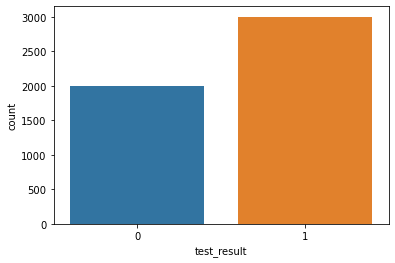

In [26]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

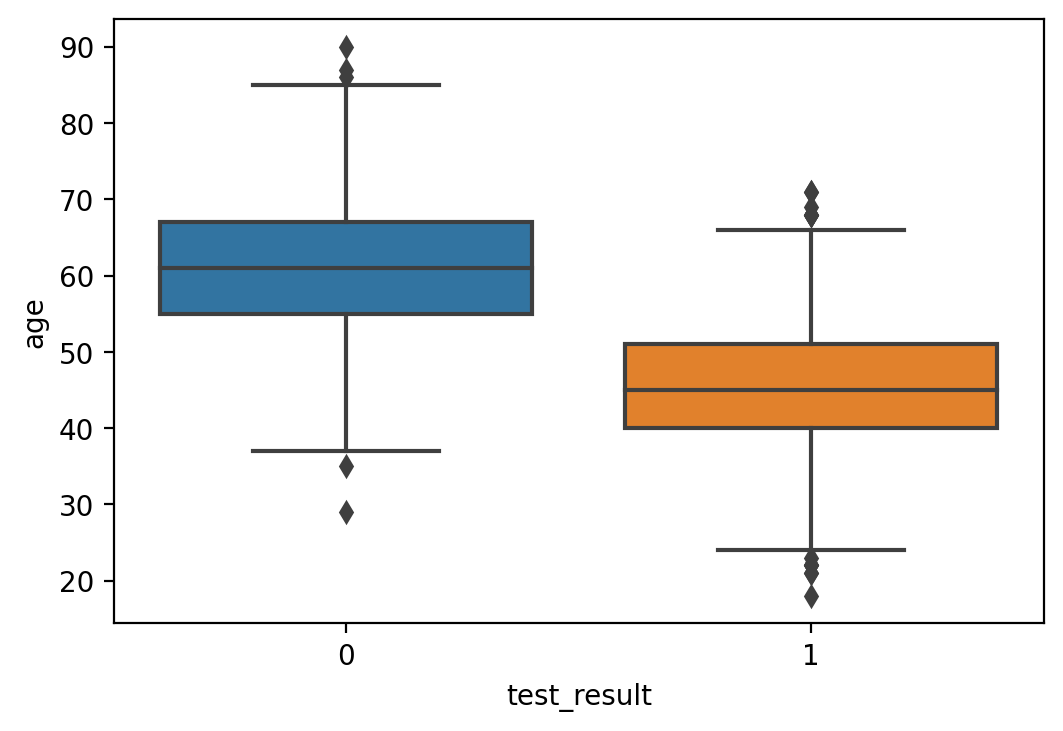

In [27]:
plt.figure(dpi=200)
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

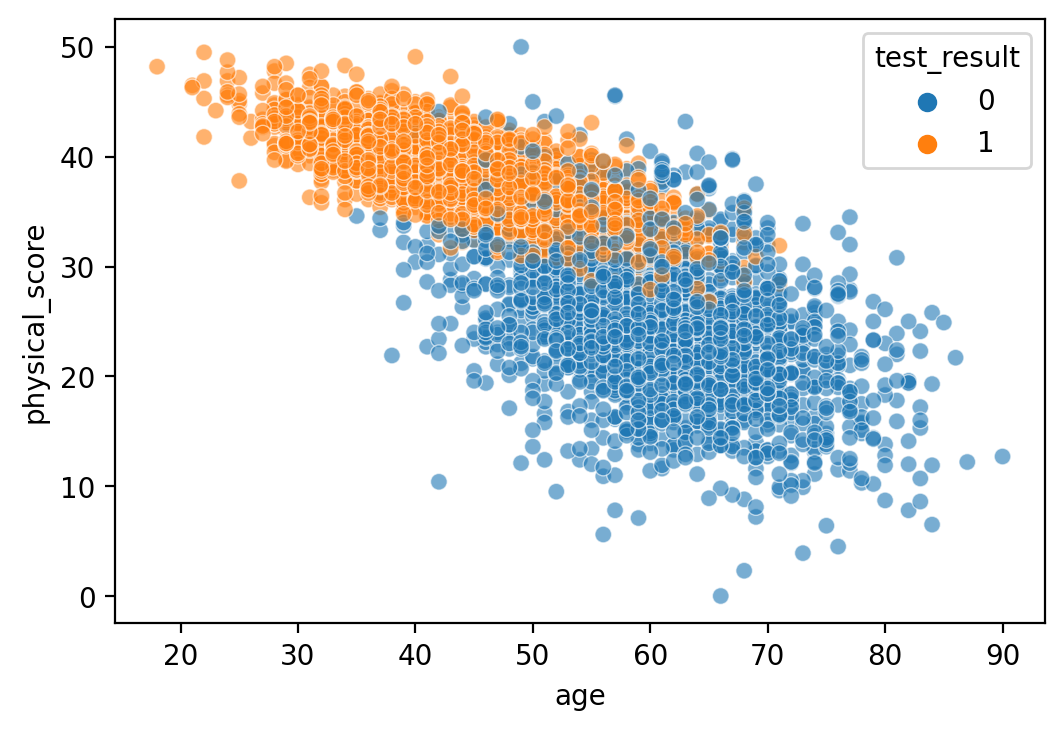

In [28]:
plt.figure(dpi=200)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.6)

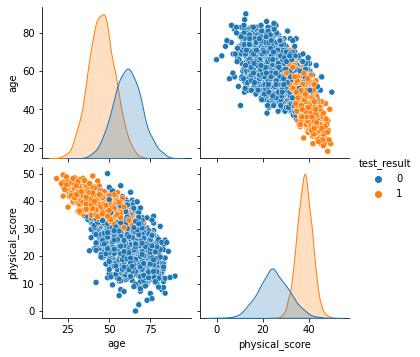

In [29]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

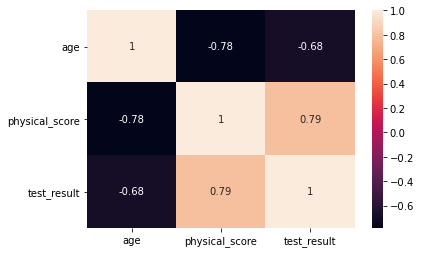

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [34]:
scaler = StandardScaler()

In [35]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()

In [38]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [39]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [40]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

<h1>Precision, Recall, F1-Score</h1>

<h3> Recall </h3>
When it actually is a positive case, how often is it correct? (TP)/Total Actual Positives

<h3>Precision</h3>
When prediction is positive, how often is it correct? (TP)/Total Predicted Positives

<h3> F1-Score </h3>
Harmonic mean of precision and recall F = (2 X precision X recall)/(precision + recall)

<h1>Classification Metrics</h1>
ROC - Curves

We can use AUC (Area under the curve) to compare ROCs 

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
accuracy_score(y_test,y_pred)

0.924

In [44]:
confusion_matrix(y_test,y_pred)
#[[TP,FN
#  FP,TN]]

array([[173,  20],
       [ 18, 289]], dtype=int64)

In [45]:
from sklearn.metrics import plot_confusion_matrix

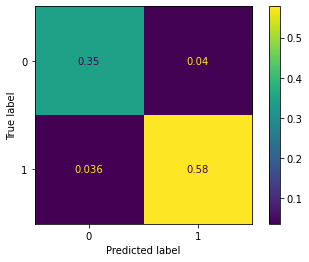

In [50]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='all')

for classification_report it outputs a string, so to format it properly, we need to use print()

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [53]:
from sklearn.metrics import precision_score,recall_score

In [54]:
precision_score(y_test,y_pred)

0.9352750809061489

In [55]:
recall_score(y_test,y_pred)

0.9413680781758957

plot the curve

In [56]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

use ax to connect

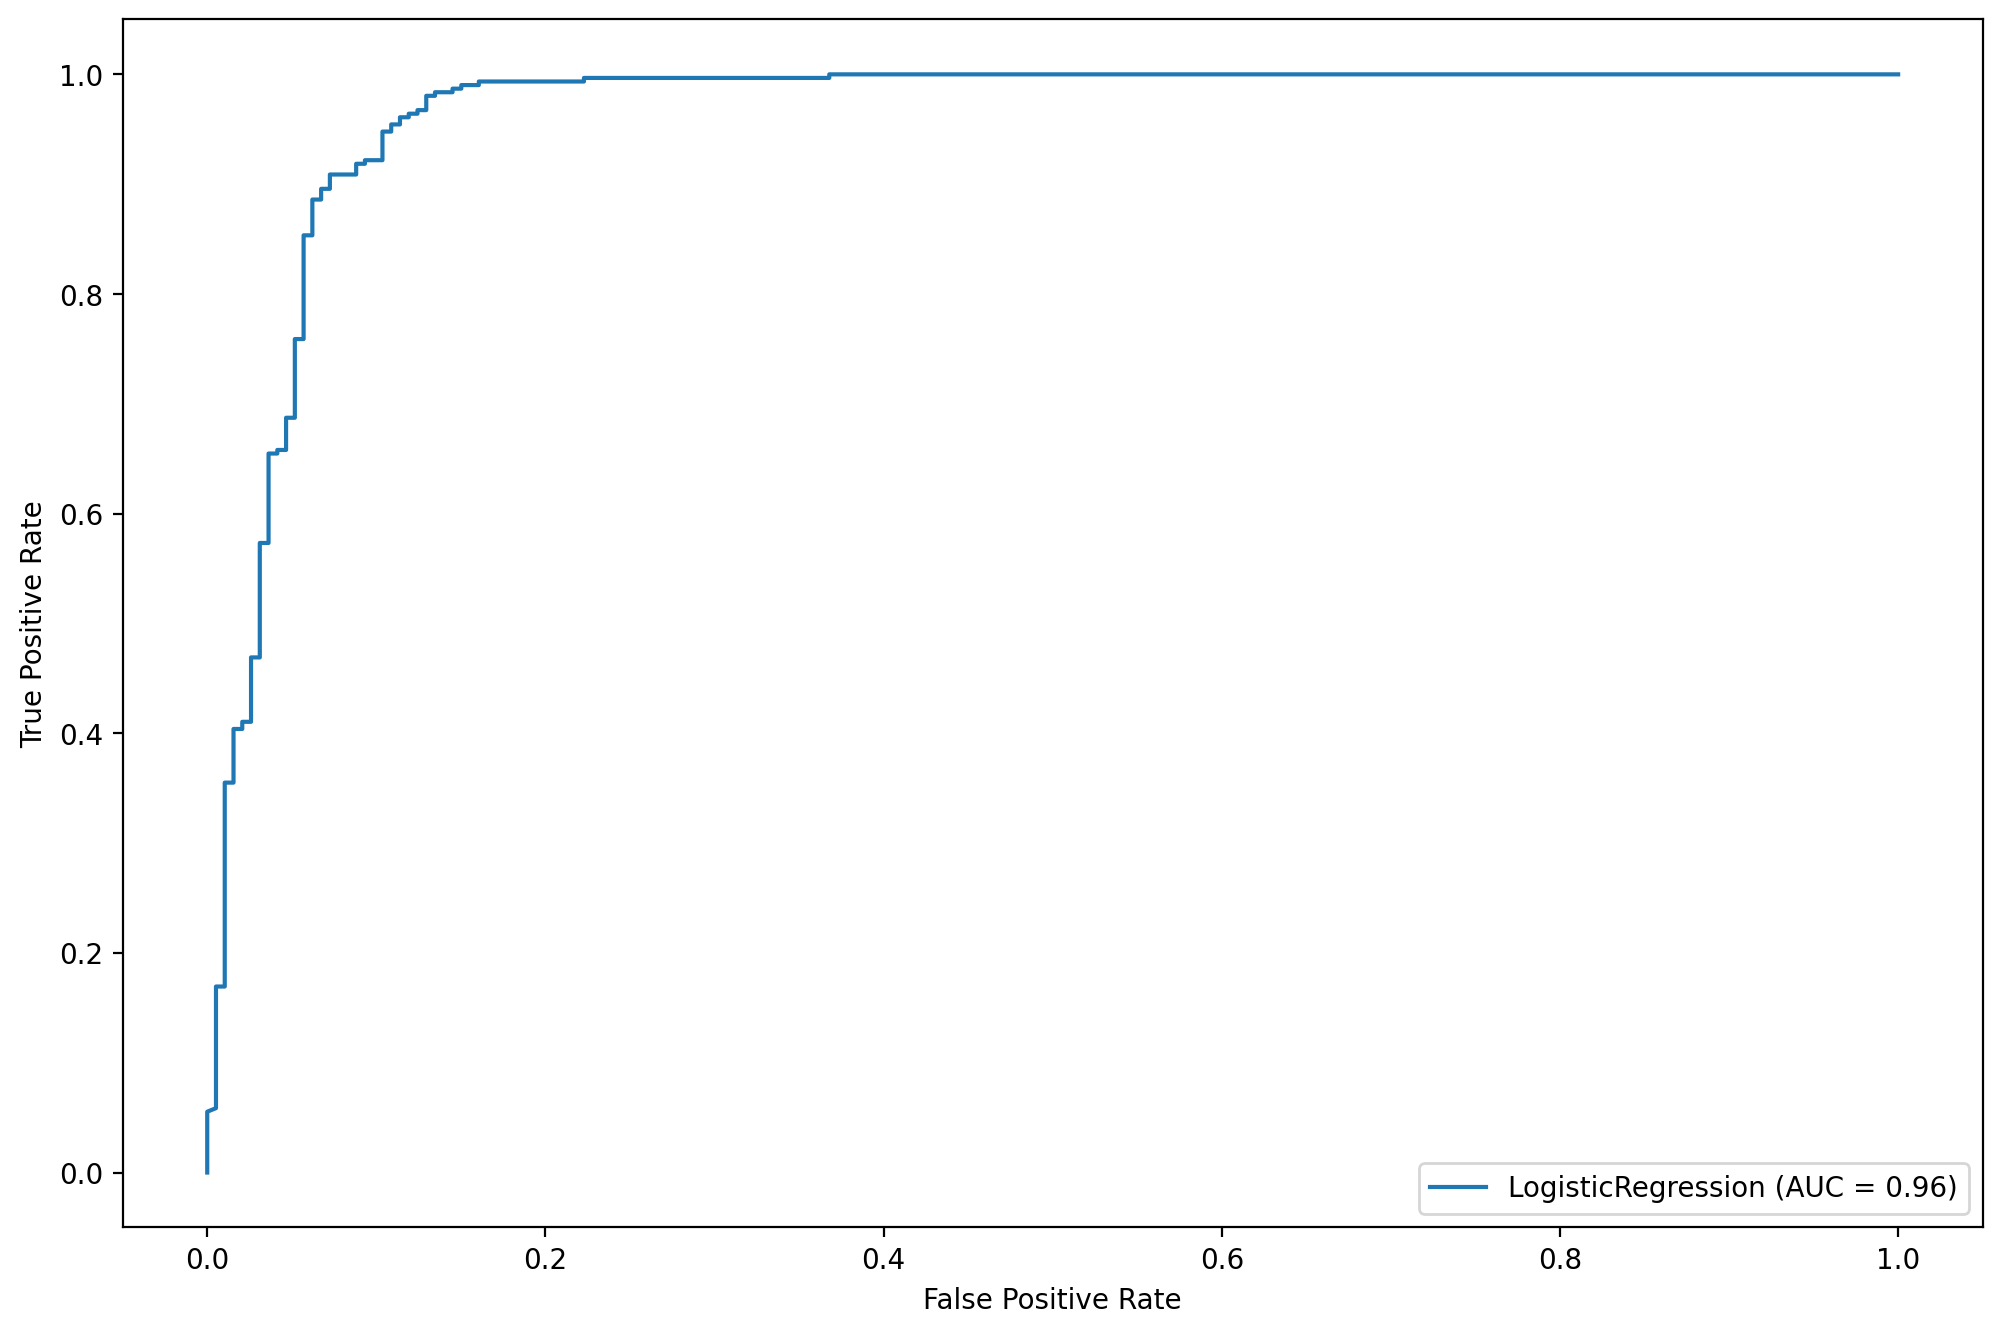

In [58]:
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)

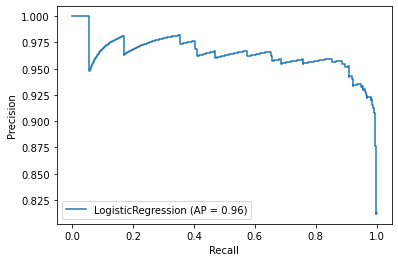

In [59]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [61]:
log_model.predict_proba(scaled_X_test)[0]
#gives you the probabilities of belonging to the classes

array([0.03092672, 0.96907328])

it labels the first one as class 1, and we can see it has 0.969% of belonging to class 1

In [62]:
y_test[0]

1

<h1>Multiple Classes</h1>

In [63]:
df = pd.read_csv('DATA/iris.csv')

In [64]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [66]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

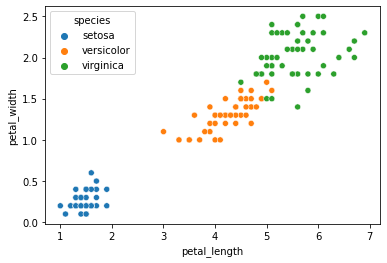

In [70]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

<Figure size 1200x800 with 0 Axes>

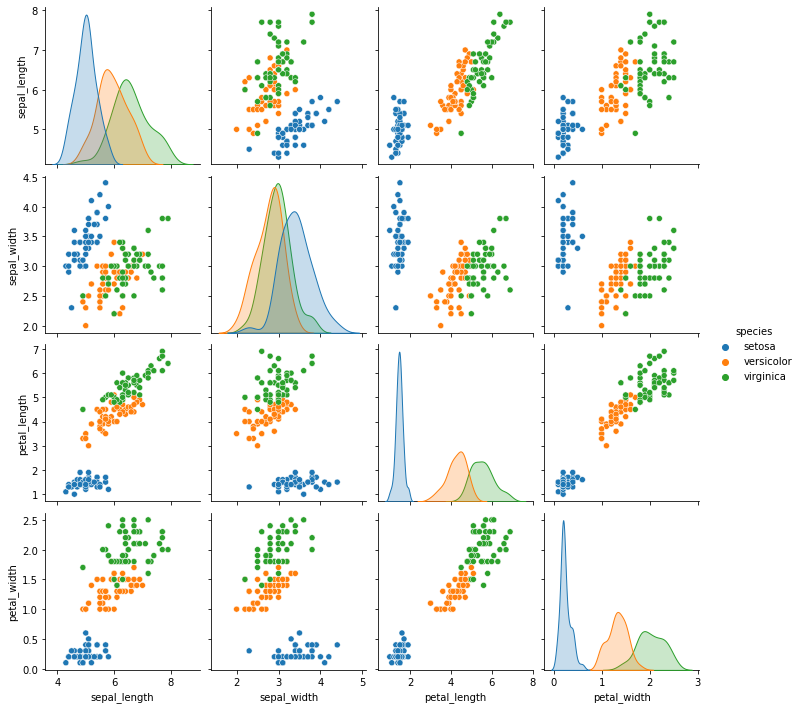

In [72]:
plt.figure(dpi=200)
sns.pairplot(df,hue='species')

<AxesSubplot:>

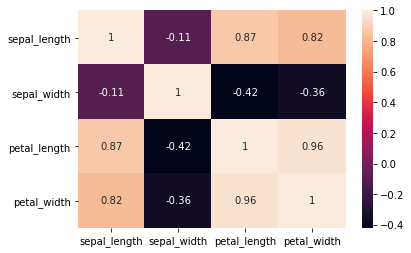

In [73]:
sns.heatmap(df.corr(),annot=True)

in scikit-learn, you can pass classes as strings

In [74]:
X = df.drop('species',axis=1)
y = df['species']

since there is not that much data, we scale the test_size to 25%

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [88]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [77]:
from sklearn.model_selection import GridSearchCV

In [80]:
log_model = LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

<h1>Multi_Class</h1>
For multi class, we can choose 'ovr' so it takes one class, and compares it to the rest, and it keeps doing that for every class

In [84]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
#C is the lamba term

param_grid = {'penalty': penalty,
              'l1_ratio': l1_ratio,
              'C': C}

In [85]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [89]:
grid_model.fit(scaled_X_train,y_train)

c:\Users\dagui\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
c:\Users\dagui\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
c:\Users\dagui\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
c:\Users\dagui\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
c:\Users\dagui\Anaconda3\lib\sit

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [90]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [92]:
y_pred = grid_model.predict(scaled_X_test)

In [93]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [94]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [95]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

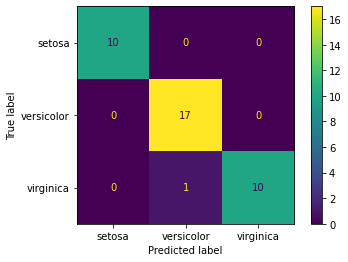

In [96]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

